In [1]:
using DataFrames, Dates
import PlotlyJS, Random
Random.seed!(1234)

include("../Engine/Engine.jl")
using .Engine;

WebIO._IJuliaInit()

## Load the data and format it

In [2]:
data = load_dataset(COP26);

# data = load_dataset(COP27);

# data = load_dataset(RandomDays);

## Define the partition, actors and actions

In [3]:
# partition_func = cop_26_dates
# action_func = trust_score
# actor_func = all_users(by_partition=true, min_tweets=3)


partition_func = cop_26_dates
action_func = trust_score
actor_func = follower_count(by_partition=true, min_tweets=3)


# partition_func = no_partition
# action_func = trust_score
# actor_func = all_users(by_partition=true, min_tweets=3)
# actor_func = follower_count(min_tweets=3, actor_number=500, aggregate_size=100000)


# partition_func = cop_26_dates
# action_func = trust_score
# actor_func = IP_scores


# partition_func = cop_27_dates
# action_func = trust_score
# actor_func = follower_count


# partition_func = no_partition
# action_func = trust_score
# actor_func = follower_count

(Main.Engine.PreProcessing.var"#12#13"{Int64, Int64, Int64}(3, 500, 1000), "follower_count(by_partition=true, min_tweets=3, actor_number=500, aggregate_size=1000)")

In [4]:
agents = PreProcessingAgents(partition_func, action_func, actor_func)
df = preprocessing(data, agents)
partitions, actions, actors = partitions_actions_actors(df);

## Statistics on the data

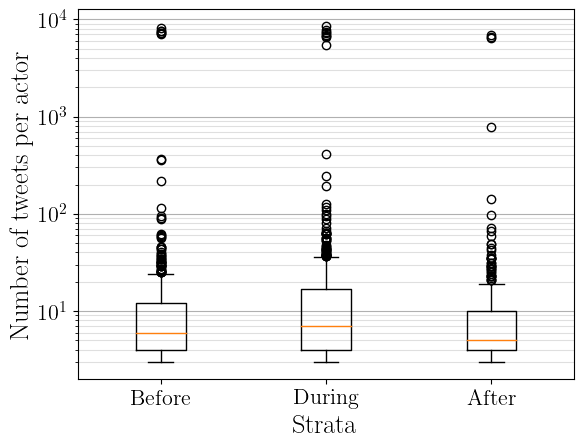

In [5]:
plot_actor_frequency(df, save=false);

In [6]:
plot_actor_wordcloud(df, Nactor=300, save=false)

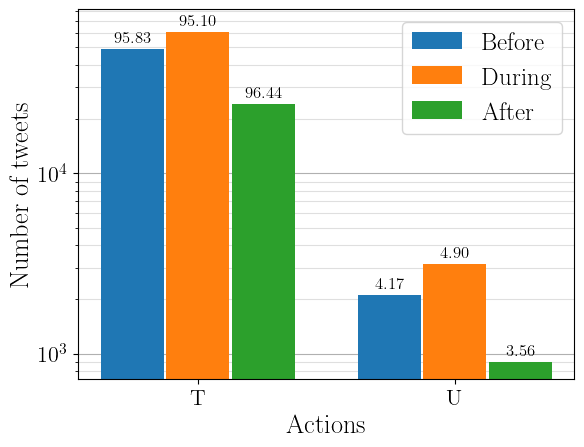

In [7]:
plot_action_frequency(df, save=false);

## Compute influence graph

In [8]:
hours = 2
minutes = 0;

In [9]:
total_min = hours*60 + minutes

cuttoff = 0
tsg = TimeSeriesGenerator(Minute(total_min), standardize=false)
ig = InfluenceGraphGenerator(SimpleTE, surrogate=nothing)
icg = InfluenceCascadeGenerator(WithoutCuttoff)


# cuttoff = 0
# tsg = TimeSeriesGenerator(Minute(total_min), standardize=false)
# ig = InfluenceGraphGenerator(SimpleTE)
# icg = InfluenceCascadeGenerator(WithoutCuttoff)



# cuttoff = 0
# tsg = TimeSeriesGenerator(Minute(total_min), standardize=true)
# ig = InfluenceGraphGenerator(JointDistanceDistribution, surrogate=nothing, threshold=0.001)
# icg = InfluenceCascadeGenerator(WithoutCuttoff)


# cuttoff = 0
# tsg = TimeSeriesGenerator(Minute(total_min), standardize=true)
# ig = InfluenceGraphGenerator(JointDistanceDistribution, surrogate=nothing, Nsurro=100, threshold=0.001, seed=1234)
# icg = InfluenceCascadeGenerator(WithoutCuttoff)

InfluenceCascadeGenerator(0, true)

In [10]:
time_series = observe(df, tsg);

In [11]:
influence_graphs = observe(time_series, ig); 

## Compute influence cascade

In [12]:
influence_cascades = observe.(influence_graphs, Ref(icg))

edge_types = [string(n1, " to ", n2) for n1 in actions for n2 in actions]
push!(edge_types, "Any Edge");

LoadError: UndefVarError: actions not defined

## Plot influence graph

In [ ]:
# partition = "During COP27"
partition = "During COP26"
# partition = "Full dataset"


edge = "T to T";

In [ ]:
# partition = "During COP27"
partition = "During COP26"
# partition = "Full dataset"

edge = "T to T"

	
plot_graph(influence_graphs, df, partition, cuttoff, edge_type=edge, print_node_names=false)

In [ ]:
plot_edge_types(influence_graphs, df, cuttoff, y="count", hue_order=["Before COP26", "During COP26", "After COP26"], log=false,
 save=false);

In [ ]:
plot_edge_types(influence_graphs, df, cuttoff, y="count_normalized", hue_order=["Before COP26", "During COP26", "After COP26"], log=false,
 save=false);

## Plot cascades and statistics

In [ ]:
partition_index = 1
influencer_indices = [ic.root for ic in influence_cascades[partition_index]]
influencers = sort(actors[influencer_indices])

In [ ]:
if length(influencers) > 0
    influencer_node1 = influencers[1]

    PlotlyJS.plot(plot_cascade_sankey(influence_cascades[partition_index][findfirst(influencer_node1 .== influencers)], df)...)
    # PlotlyJS.savefig(PlotlyJS.plot(plot_cascade_sankey(influence_cascades[partition_index][findfirst(influencer_node1 .== influencers)], df)...), RESULT_FOLDER * "/cascade.pdf")
end

In [ ]:
plot_actors_per_level(influence_cascades, df, log=false, inner_spacing=0.02, save=false);